# Sentiment Analysis - Business Reviews
### Classifying Positive and Negative Review using NLP

**Author**: Miguel Santana

Thank you for reviewing this repository. The author's contact info, sources and social media profiles are listed below under **further information.**

The contents of this repository detail an analysis of two text files: Amazon product reviews and movie reviews. The movie review file is similar to the one used in the github project **Text Classification - Movie Reviews.** The file was used in order to compare text versus sentiment classification. 

For illustrative purposes, text has been preprocessed and the labels are provided in order to assess model performance. The analysis will provide insight into method's used by NLP professionals to evaluate text for businesses.

#### Project Framework | OSEMN

**Data processing and analysis is completed using the OSEMN framework. The structure includes: Obtaining the data, Scrubbing (Processing), Exploratory Data Analysis, Statistical Modeling and Interpretation of the Results.**

#### The Data

The movie review dataset is originally sourced from Stanford Artificial Intelligence Laboratory (SAIL) but was provided via Udemy. The Amazon text file was also provided via the same course. The Udemy citation is available below under **sources.** Please visit [ai.stanford.edu](http://ai.stanford.edu/~amaas/data/sentiment/) for more information on the movie review dataset. 

#### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('white')

In [2]:
# sentiment analysis 
import nltk
# nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

<div class="alert alert-block alert-info">
Valence Aware Dictionary for Sentiment Reasoning (VADER) is a model used for text sentiment analysis in natural language processing. The model offers insight into polarity as well as intensity, referring to positive, neutral, negative and by how much. 
</div>

## Import Data
# Amazon Reviews

In [3]:
df = pd.read_csv('data/amazonreviews.tsv',sep='\t')

print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   10000 non-null  object
 1   review  10000 non-null  object
dtypes: object(2)
memory usage: 156.4+ KB
None


,label,review
0,pos,Stuning even for the non-gamer: This sound tra...
1,pos,The best soundtrack ever to anything.: I'm rea...
2,pos,Amazing!: This soundtrack is my favorite music...
3,pos,Excellent Soundtrack: I truly like this soundt...
4,pos,"Remember, Pull Your Jaw Off The Floor After He..."


## Scrubbing | Data Cleaning
#### Null Values and White Space

In [4]:
# checking whitespace strings
blanks = []

# iterate through / check missing
for ind,label,review in df.itertuples():
    if type(review) == str: # if string
        if review.isspace(): # check if whitespace
            blanks.append(ind) # append index position

In [5]:
# whitespace strings
print(f'There are {len(blanks)} whitespace strings in the dataset.')

There are 0 whitespace strings in the dataset.


In [6]:
# df.dropna(inplace=True) # no null values

In [7]:
# df.drop(blanks,inplace=True) # no white space strings

## Exploratory Data Analysis
#### Class Balance

In [8]:
df['label'].value_counts()

neg    5097
pos    4903
Name: label, dtype: int64

#### Length of Reviews

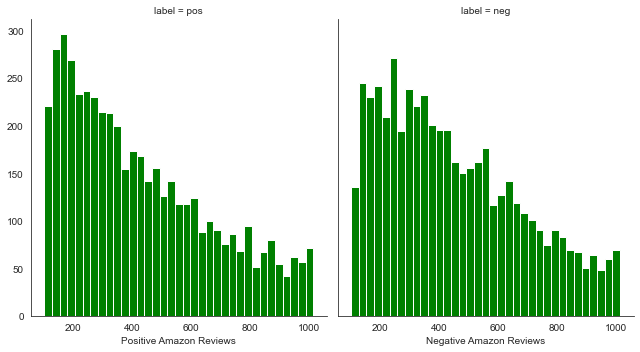

In [9]:
# review length
df['review length'] = df['review'].apply(len)

# illustrate
d = {'color':'g'}
g = sns.FacetGrid(df,col='label',height=5,aspect=.9,hue_kws=d)
g.map(plt.hist,'review length',bins=35)
g.axes[0,0].set_xlabel('Positive Amazon Reviews')
g.axes[0,1].set_xlabel('Negative Amazon Reviews')
# g.savefig('amazonlength.jpg',dpi=200,bbox_inches='tight')
plt.show();

<div class="alert alert-block alert-info">

The classes are very well balanced (positive vs. negative). The reviews also seem to be similar in length. Accuracy will be an appropriate validation metric. 

</div>

## Model | Vadar Analyzer

In [10]:
sid = SentimentIntensityAnalyzer()

In [11]:
sid.polarity_scores(df.iloc[0]['review'])

{'neg': 0.088, 'neu': 0.669, 'pos': 0.243, 'compound': 0.9454}

<div class="alert alert-block alert-info">

The analyzer generates 4 scores: negative, neutral, positive and a final compound score (normalized from the first three). 

</div>

#### Generating All Polarity Scores

In [12]:
df['scores'] = df['review'].apply(lambda review: sid.polarity_scores(review))

<div class="alert alert-block alert-info">

Vadar classifies using a compound score where less than zero refers to a negative sentiment, zero refers to neutral and a positive compound value refers to a positive sentiment.

</div>

In [13]:
# isolating compound scores from 'scores' dictionary
df['compound'] = df['scores'].apply(lambda d:d['compound'])

In [14]:
# convert compound for comparison
df['comp_score'] = df['compound'].apply(lambda score: 'pos' if score >=0 else 'neg')

In [15]:
df.head(3)

,label,review,review length,scores,compound,comp_score
0,pos,Stuning even for the non-gamer: This sound tra...,426,"{'neg': 0.088, 'neu': 0.669, 'pos': 0.243, 'co...",0.9454,pos
1,pos,The best soundtrack ever to anything.: I'm rea...,509,"{'neg': 0.018, 'neu': 0.837, 'pos': 0.145, 'co...",0.8957,pos
2,pos,Amazing!: This soundtrack is my favorite music...,760,"{'neg': 0.04, 'neu': 0.692, 'pos': 0.268, 'com...",0.9858,pos


### Validation

In [16]:
acc = accuracy_score(df['label'],df['comp_score'])
print(classification_report(df['label'],df['comp_score']))
print('\n')
print(f'There overall accuracy score is {acc}.')

              precision    recall  f1-score   support

         neg       0.86      0.51      0.64      5097
         pos       0.64      0.91      0.75      4903

    accuracy                           0.71     10000
   macro avg       0.75      0.71      0.70     10000
weighted avg       0.75      0.71      0.70     10000



There overall accuracy score is 0.7091.


<div class="alert alert-block alert-info">

Vadar performs well given the ease of use and little amount of code required. One of the weaknesses of Vadar is the processing of both negative and positive comments within a same text - as is common in product reviews. In addition, Vadar has trouble with sarcasm due to the use of positive words in a negative way.  

</div>

# Movie Reviews

Next we will analyze the **movie review** file and compare Vadar performance for correctly classifying reviews as positive or negative using sentiment analysis. 

In [17]:
df = pd.read_csv('data/moviereviews.tsv',sep='\t')

print(df.info())
df.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   2000 non-null   object
 1   review  1965 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB
None


,label,review
0,neg,how do films like mouse hunt get into theatres...
1,neg,some talented actresses are blessed with a dem...
2,pos,this has been an extraordinary year for austra...
3,pos,according to hollywood movies made in last few...
4,neg,my first press screening of 1998 and already i...


In [18]:
print(f'There are {len(df)} movie reviews in this dataset.')

There are 2000 movie reviews in this dataset.


## Scrubbing | Data Cleaning
#### Null Values and White Space

In [19]:
# drop null values
df.dropna(inplace=True)

In [20]:
# checking whitespace strings
blanks = []

# iterate through / check missing
for ind,label,review in df.itertuples():
    if type(review) == str: # if string
        if review.isspace(): # check if whitespace
            blanks.append(ind) # append index position

In [21]:
# whitespace strings
print(f'There are {len(blanks)} whitespace strings in the dataset.')

There are 27 whitespace strings in the dataset.


In [22]:
# drop whitespace strings
df.drop(blanks,inplace=True)

## Exploratory Data Analysis
#### Class Balance

In [23]:
df['label'].value_counts()

pos    969
neg    969
Name: label, dtype: int64

<div class="alert alert-block alert-info">

The dataset has an even distribution of positive and negative reviews. This makes accuracy a great metric for our model analysis.

</div>

#### Length of Reviews

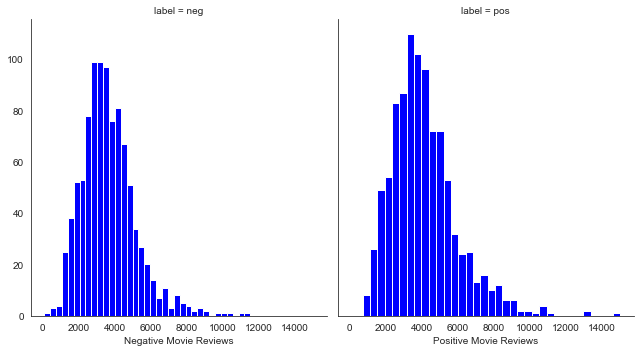

In [24]:
# review length
df['review length'] = df['review'].apply(len)

# illustrate
d = {'color':'b'}
g = sns.FacetGrid(df,col='label',height=5,aspect=.9,hue_kws=d)
g.map(plt.hist,'review length',bins=35)
g.axes[0,0].set_xlabel('Negative Movie Reviews')
g.axes[0,1].set_xlabel('Positive Movie Reviews')
# g.savefig('movielength.jpg',dpi=200,bbox_inches='tight')
plt.show();

<div class="alert alert-block alert-info">

The distribution of review lengths is similar for negative and positive reviews.

</div>

In [25]:
sid = SentimentIntensityAnalyzer()

#### Generating All Polarity Scores

In [26]:
df['scores'] = df['review'].apply(lambda review: sid.polarity_scores(review))

In [27]:
# isolating compound scores from 'scores' dictionary
df['compound'] = df['scores'].apply(lambda d:d['compound'])

In [28]:
# convert compound for comparison
df['comp_score'] = df['compound'].apply(lambda score: 'pos' if score >=0 else 'neg')

#### Validation

In [29]:
acc = accuracy_score(df['label'],df['comp_score'])
print(classification_report(df['label'],df['comp_score']))
print('\n')
print(f'There overall accuracy score is {acc}.')

              precision    recall  f1-score   support

         neg       0.72      0.44      0.55       969
         pos       0.60      0.83      0.70       969

    accuracy                           0.64      1938
   macro avg       0.66      0.64      0.62      1938
weighted avg       0.66      0.64      0.62      1938



There overall accuracy score is 0.6367389060887513.


<div class="alert alert-block alert-info">

Vader didn't give the best performance, especially when compared to the text classifier in the **Text Classification - Movie Reviews** project. Performance may have been effected by various features including sarcasm and both positive and negative semantics within the same movie review. 

</div>

# Interpreting Results 

The Vader sentiment analyzer was unable to out perform the text classifier but it offered insight into advancements in natural language processing. Keep in mind, Vader processed the raw text and offered respectable performance despite a lack of train test split or parameter tuning. Human semantics can be tricky and I look forward to continued advancements in sentiment analysis with respect to natural language processing. 

### Future Work

Future work should include web scraping of additional sources to get a broader view of Vader's performance across multiple disciplines and industries. In future projects, speech-to-text in combination with text classification should be applied to larger and more robust data sets in order to evaluate performance on real business cases.  

#### Further Information

For any additional questions, please reach out via email at santana2.miguel@gmail.com, on [LinkedIn](https://www.linkedin.com/in/miguel-angel-santana-ii-mba-51467276/) or on [Twitter.](https://twitter.com/msantana_ds)

#### Sources

Additional analysis, notes and file sources can be found on Udemy. 

* Course Name: NLP - Natural Language Processing by Jose Portilla